In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [6]:
FW = pd.read_csv('./position data/FW_5seasons.csv')
FW.drop('Unnamed: 0', axis=1, inplace=True)
FW

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,Yellow,Red,...,Fouled,Off,Disp,UnsTch,AvgP,PSp,Crosses,LonB,ThrB,Pts
0,Robert Lewandowski,Bayern Munich,35,FW,33,2959,22,7,2,0,...,1.4,0.9,1.5,1.5,22.1,77.5,0.0,0.6,0.2,1.000000
1,Ádám Szalai,Hoffenheim,36,FW,30,1621,6,3,3,0,...,0.8,0.3,0.7,0.7,14.0,71.1,0.0,0.4,0.0,0.542373
2,Sébastien Haller,Eintracht Frankfurt,29,FW,29,2181,15,9,3,0,...,1.5,0.7,1.7,1.7,27.0,63.5,0.0,0.4,0.1,0.593220
3,Luka Jovic,Eintracht Frankfurt,26,FW,32,2249,17,5,1,0,...,1.3,0.5,1.4,1.4,18.7,70.4,0.1,0.9,0.1,0.593220
4,Lucas Alario,Bayer Leverkusen,31,FW,27,1256,9,3,1,0,...,0.9,0.5,0.9,0.9,15.0,75.5,0.0,0.3,0.0,0.661017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Cristian Buonaiuto,Cremonese,31,FW,29,970,1,0,3,0,...,0.8,0.0,1.0,1.0,13.0,73.3,0.6,0.4,0.0,0.112676
524,Daniel Ciofani,Cremonese,38,FW,32,1058,8,0,1,0,...,0.5,0.2,0.3,0.3,6.0,62.5,0.0,0.2,0.0,0.112676
525,Felix Afena-Gyan,Cremonese,21,FW,23,812,0,0,4,0,...,0.5,0.3,0.9,0.9,8.0,76.6,0.0,0.1,0.0,0.112676
526,Milan Djuric,Verona,33,FW,28,1364,1,1,3,0,...,1.0,0.2,0.5,0.5,18.5,51.6,0.0,0.1,0.0,0.169014


In [8]:
FW_df = FW.select_dtypes(['int64', 'float64'])
FW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         528 non-null    int64  
 1   Apps        528 non-null    int64  
 2   Mins        528 non-null    int64  
 3   Goals       528 non-null    int64  
 4   Assists     528 non-null    int64  
 5   Yellow      528 non-null    int64  
 6   Red         528 non-null    int64  
 7   SpG         528 non-null    float64
 8   PS          528 non-null    float64
 9   Aerialswon  528 non-null    float64
 10  MotM        528 non-null    int64  
 11  Rating      528 non-null    float64
 12  Tackles     528 non-null    float64
 13  Inter       528 non-null    float64
 14  Fouls       528 non-null    float64
 15  Offsides    528 non-null    float64
 16  Clear       528 non-null    float64
 17  Drb_def     528 non-null    float64
 18  Blocks      528 non-null    float64
 19  OwnG        528 non-null    i

# 전체 feature를 가지고 예측 모델 생성
- R-squared: 0.583
- MSE: 2544.999012366194

In [217]:
X = FW_df.drop('Pts', axis=1)
y_data = FW_df[['Pts']]

X_data = sm.add_constant(X, has_constant='add')
train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, train_size=0.7, test_size=0.3)

model = sm.OLS(train_y, train_X)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     16.75
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.84e-49
Time:                        15:51:11   Log-Likelihood:                 142.75
No. Observations:                 369   AIC:                            -225.5
Df Residuals:                     339   BIC:                            -108.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0390      0.701    -10.043      0.0

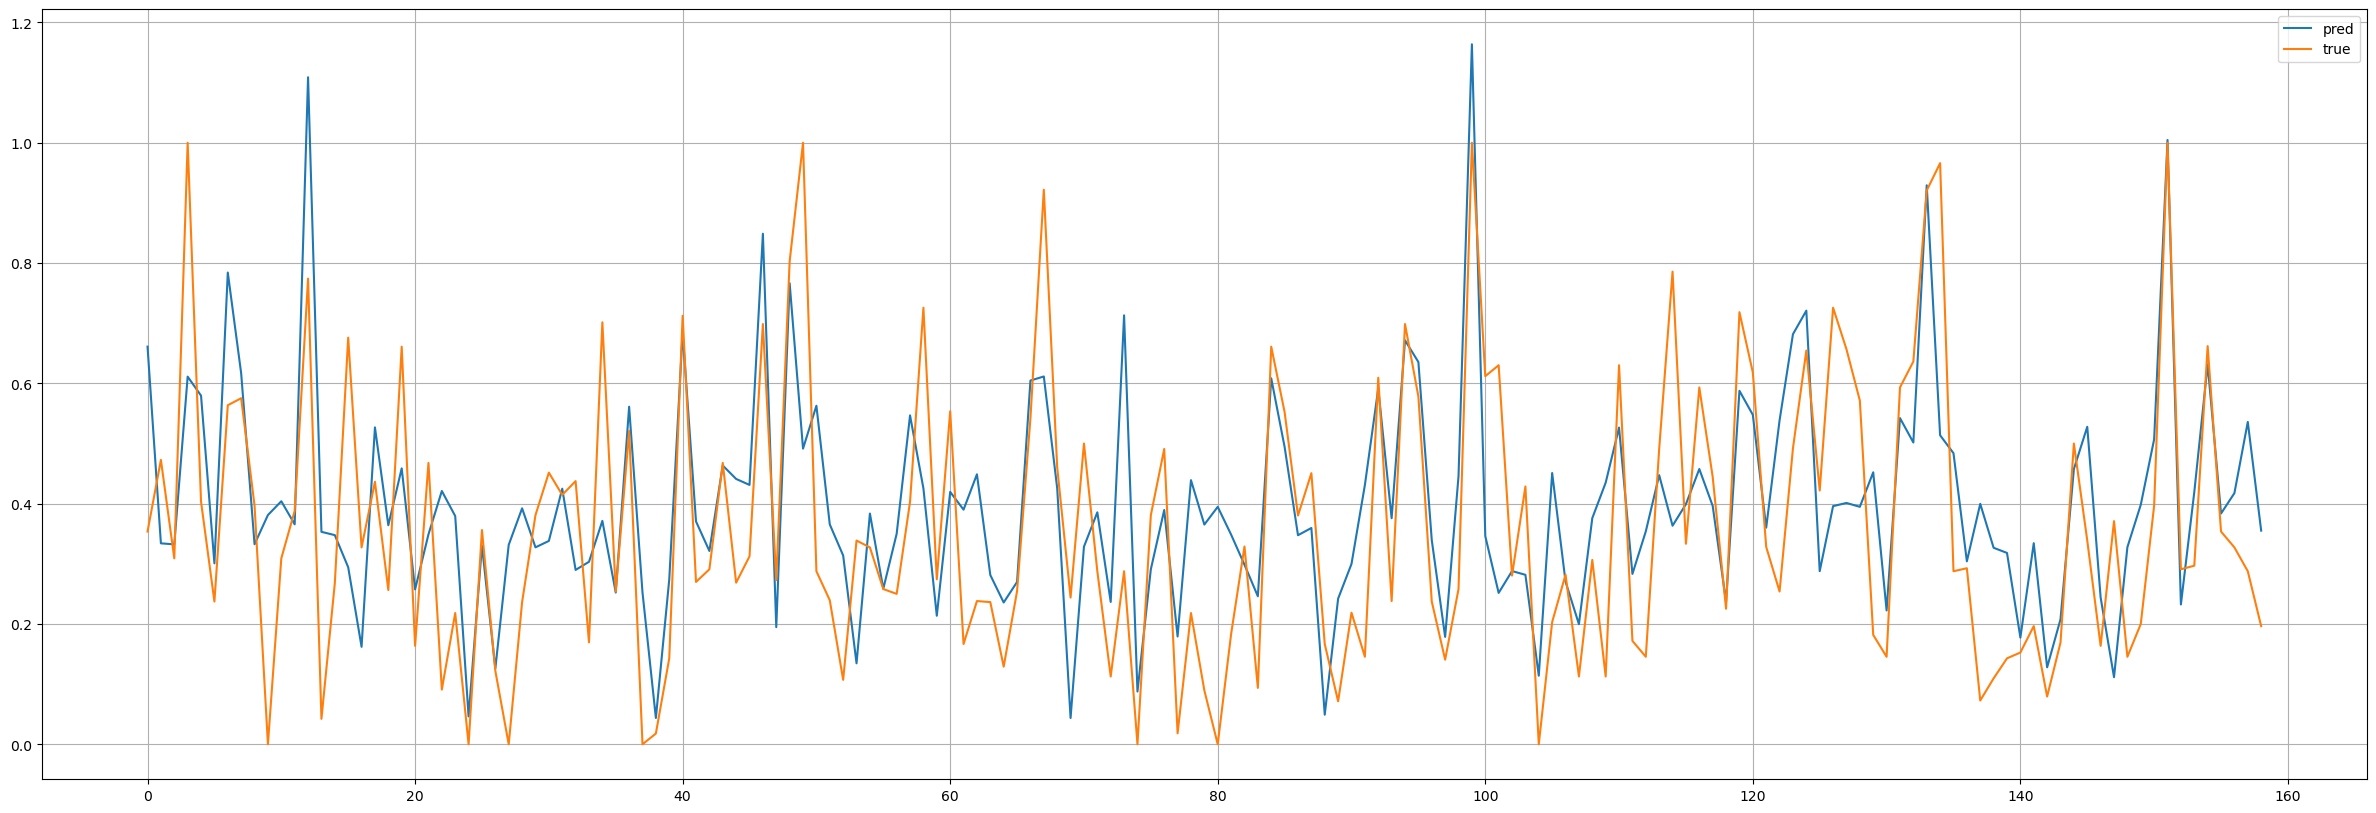

In [218]:
pred = fitted_model.predict(test_X)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [219]:
MSE = ((np.array(pred) - np.array(test_y))**2).sum() / test_X.shape[0]
MSE

14.559535615766805

# feature 정제
1. 특정 지표 하나만 가지고 모델 생성
2. 내가 뽑은 주요 지표만 가지고 모델 생성
3. 의미 없어 보이는 몇 개의 데이터만 제거한 모델

## 1-1. 특정 지표 하나만 가지고 모델 생성 - Goals
- R-squared: 0.205
- MSE: 17212.50769198861

In [17]:
X2 = FW_df[['Goals']]
y_data2 = FW_df[['Pts']]

X_data2 = sm.add_constant(X2, has_constant='add')
train_X2, test_X2, train_y2, test_y2 = train_test_split(X_data2, y_data2, train_size=0.7, test_size=0.3, random_state=42)

model2 = sm.OLS(train_y2, train_X2)
fitted_model2 = model2.fit()
print(fitted_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     94.77
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.49e-20
Time:                        15:14:03   Log-Likelihood:                 35.711
No. Observations:                 369   AIC:                            -67.42
Df Residuals:                     367   BIC:                            -59.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2485      0.018     13.953      0.0

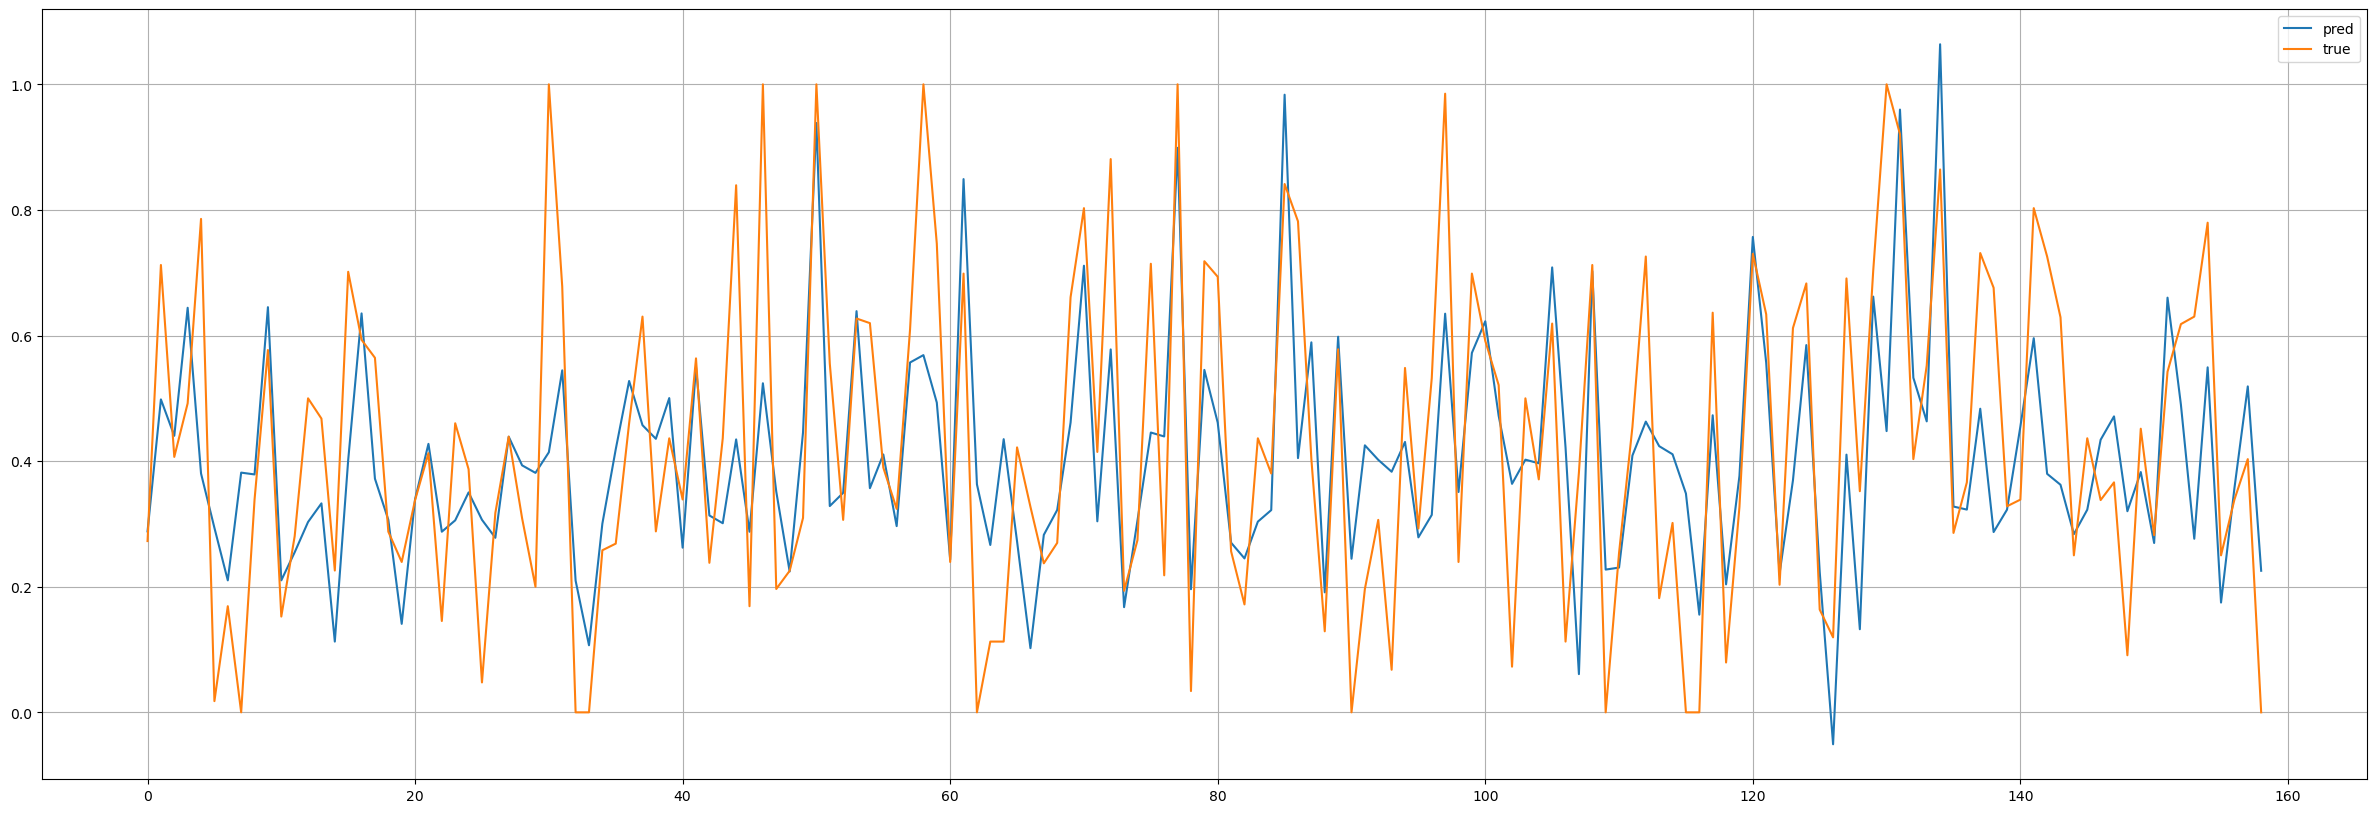

In [26]:
pred2 = fitted_model2.predict(test_X2)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y2), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [191]:
MSE2 = ((np.array(pred2) - np.array(test_y2))**2).sum() / test_X2.shape[0]
MSE2

12.72915995068301

## 1-2. 특정 지표 하나만 가지고 모델 생성 - Assists
- R-squared: 0.154
- MSE: 12624.694700608072

In [21]:
X3 = FW_df[['Assists']]
y_data3 = FW_df[['Pts']]

X_data3 = sm.add_constant(X3, has_constant='add')
train_X3, test_X3, train_y3, test_y3 = train_test_split(X_data3, y_data3, train_size=0.7, test_size=0.3, random_state=42)

model3 = sm.OLS(train_y3, train_X3)
fitted_model3 = model3.fit()
print(fitted_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     66.80
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.93e-15
Time:                        15:16:00   Log-Likelihood:                 24.181
No. Observations:                 369   AIC:                            -44.36
Df Residuals:                     367   BIC:                            -36.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2865      0.017     17.306      0.0

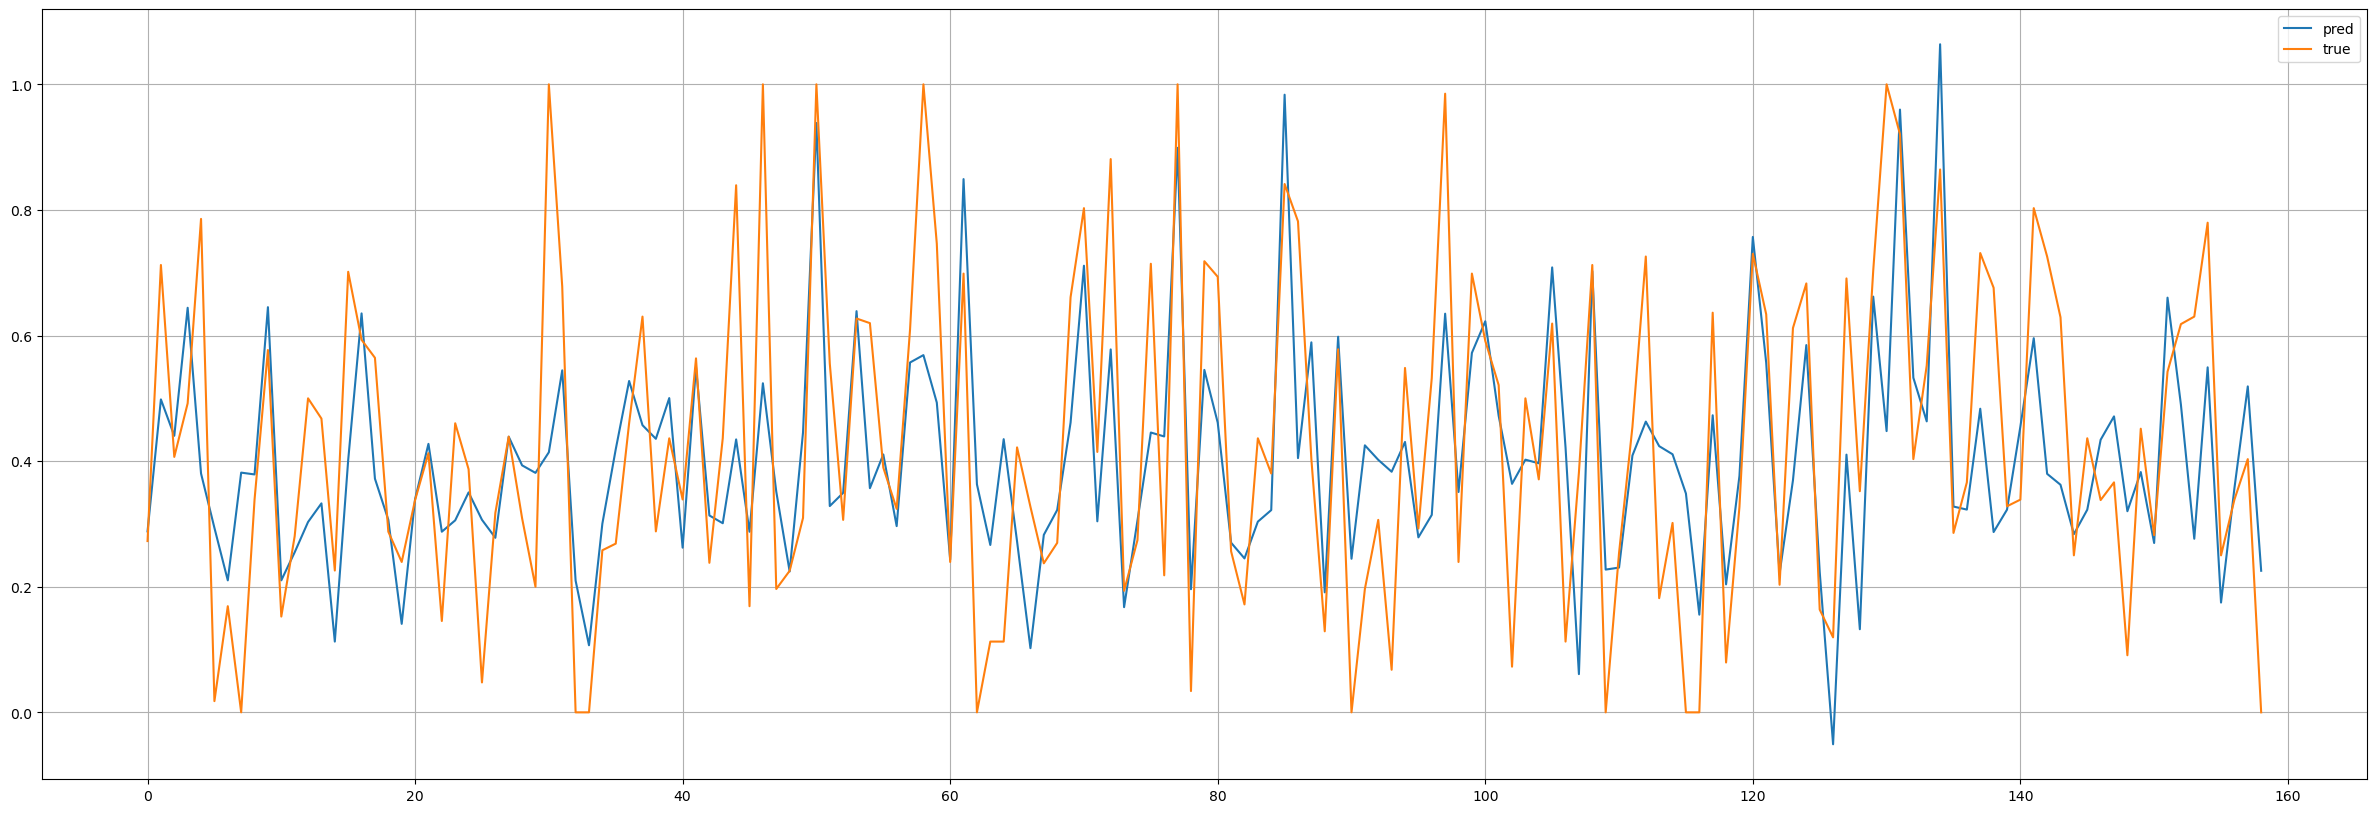

In [37]:
pred3 = fitted_model3.predict(test_X3)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y3), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [190]:
MSE3 = ((np.array(pred3) - np.array(test_y3))**2).sum() / test_X3.shape[0]
MSE3

12.30654590782028

## 1-3. 특정 지표 하나만 가지고 모델 생성 - SpG
- R-squared: 0.139
- MSE: 15686.32213555647

In [32]:
X4 = FW_df[['SpG']]
y_data4 = FW_df[['Pts']]

X_data4 = sm.add_constant(X4, has_constant='add')
train_X4, test_X4, train_y4, test_y4 = train_test_split(X_data4, y_data4, train_size=0.7, test_size=0.3, random_state=42)

model4 = sm.OLS(train_y4, train_X4)
fitted_model4 = model4.fit()
print(fitted_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     59.44
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.20e-13
Time:                        15:20:09   Log-Likelihood:                 21.024
No. Observations:                 369   AIC:                            -38.05
Df Residuals:                     367   BIC:                            -30.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2072      0.026      8.112      0.0

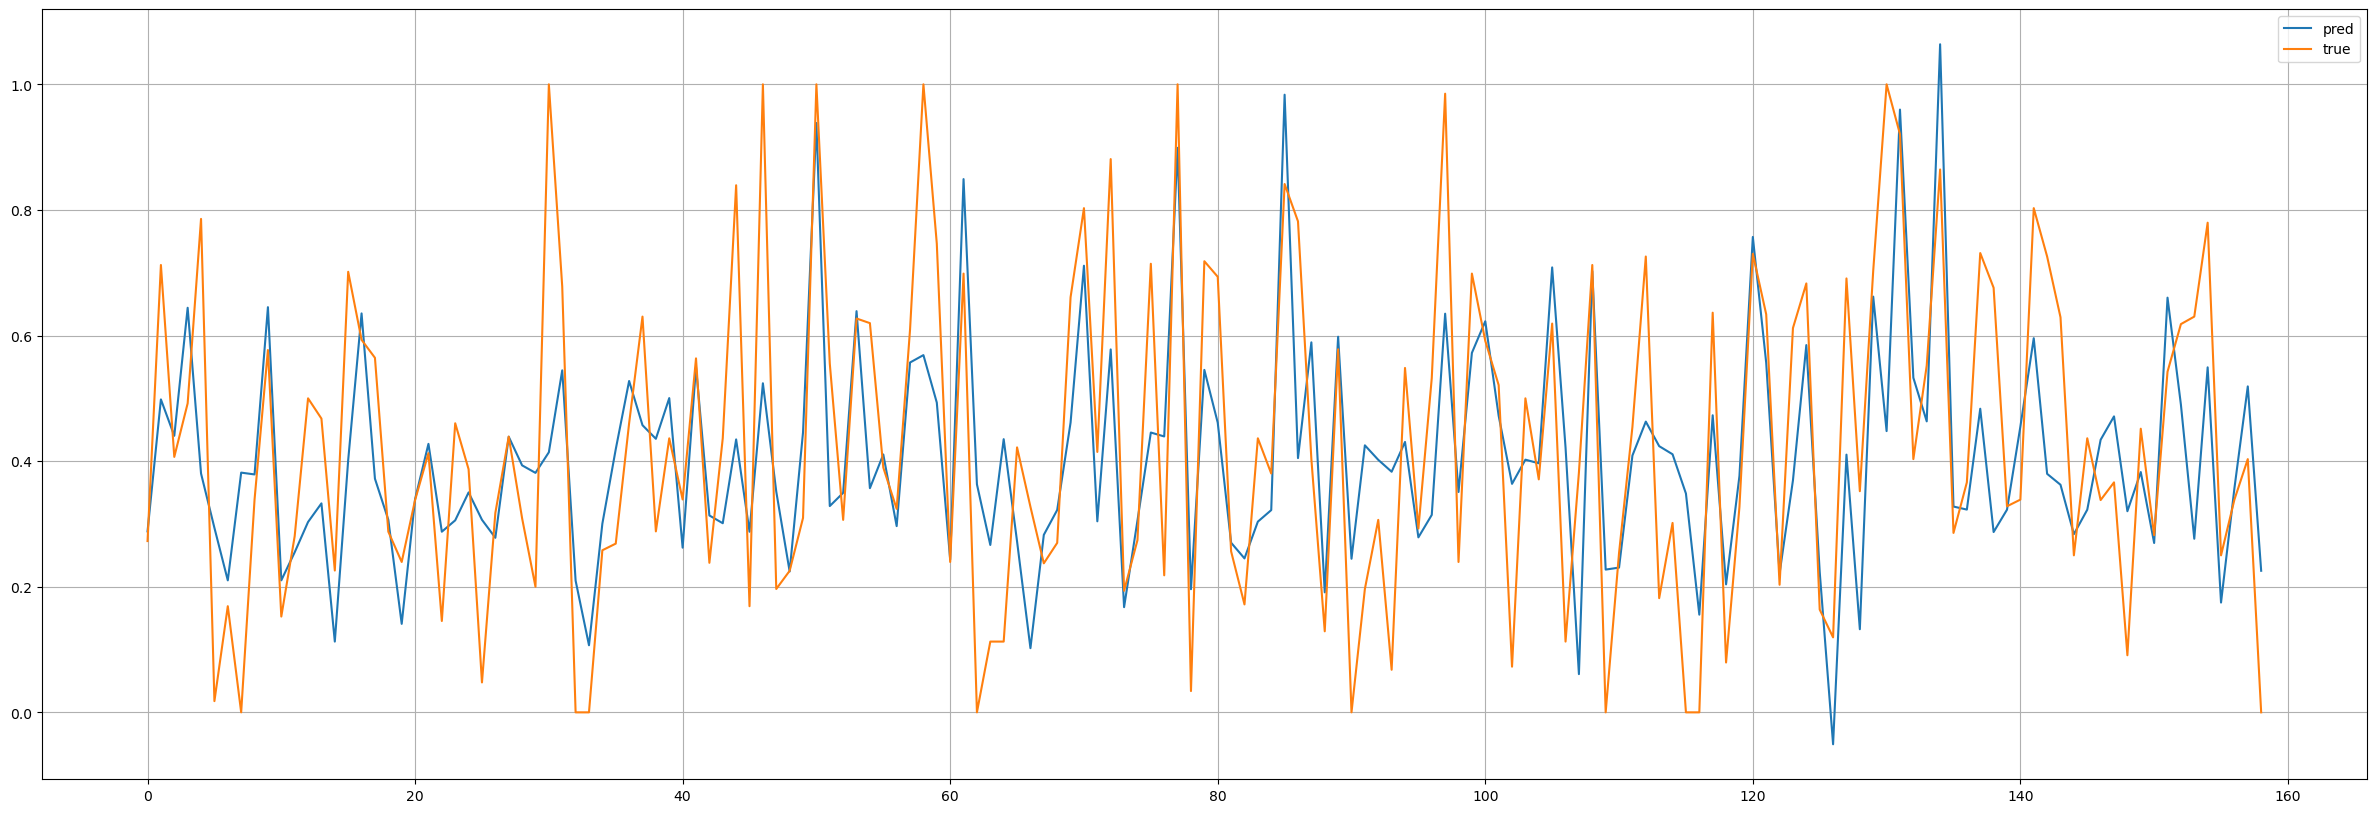

In [35]:
pred4 = fitted_model4.predict(test_X4)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y4), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [189]:
MSE4 = ((np.array(pred4) - np.array(test_y4))**2).sum() / test_X4.shape[0]
MSE4

12.931108025544361

## 2-1. 상위 3개 feature

In [171]:
X5 = FW_df[['Goals', 'Assists', 'SpG']]
y_data5 = FW_df[['Pts']]

X_data5 = sm.add_constant(X5, has_constant='add')
train_X5, test_X5, train_y5, test_y5 = train_test_split(X_data5, y_data5, train_size=0.7, test_size=0.3)

model5 = sm.OLS(train_y5, train_X5)
fitted_model5 = model5.fit()
print(fitted_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     38.52
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.20e-21
Time:                        15:44:33   Log-Likelihood:                 37.572
No. Observations:                 369   AIC:                            -67.14
Df Residuals:                     365   BIC:                            -51.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.026      9.611      0.0

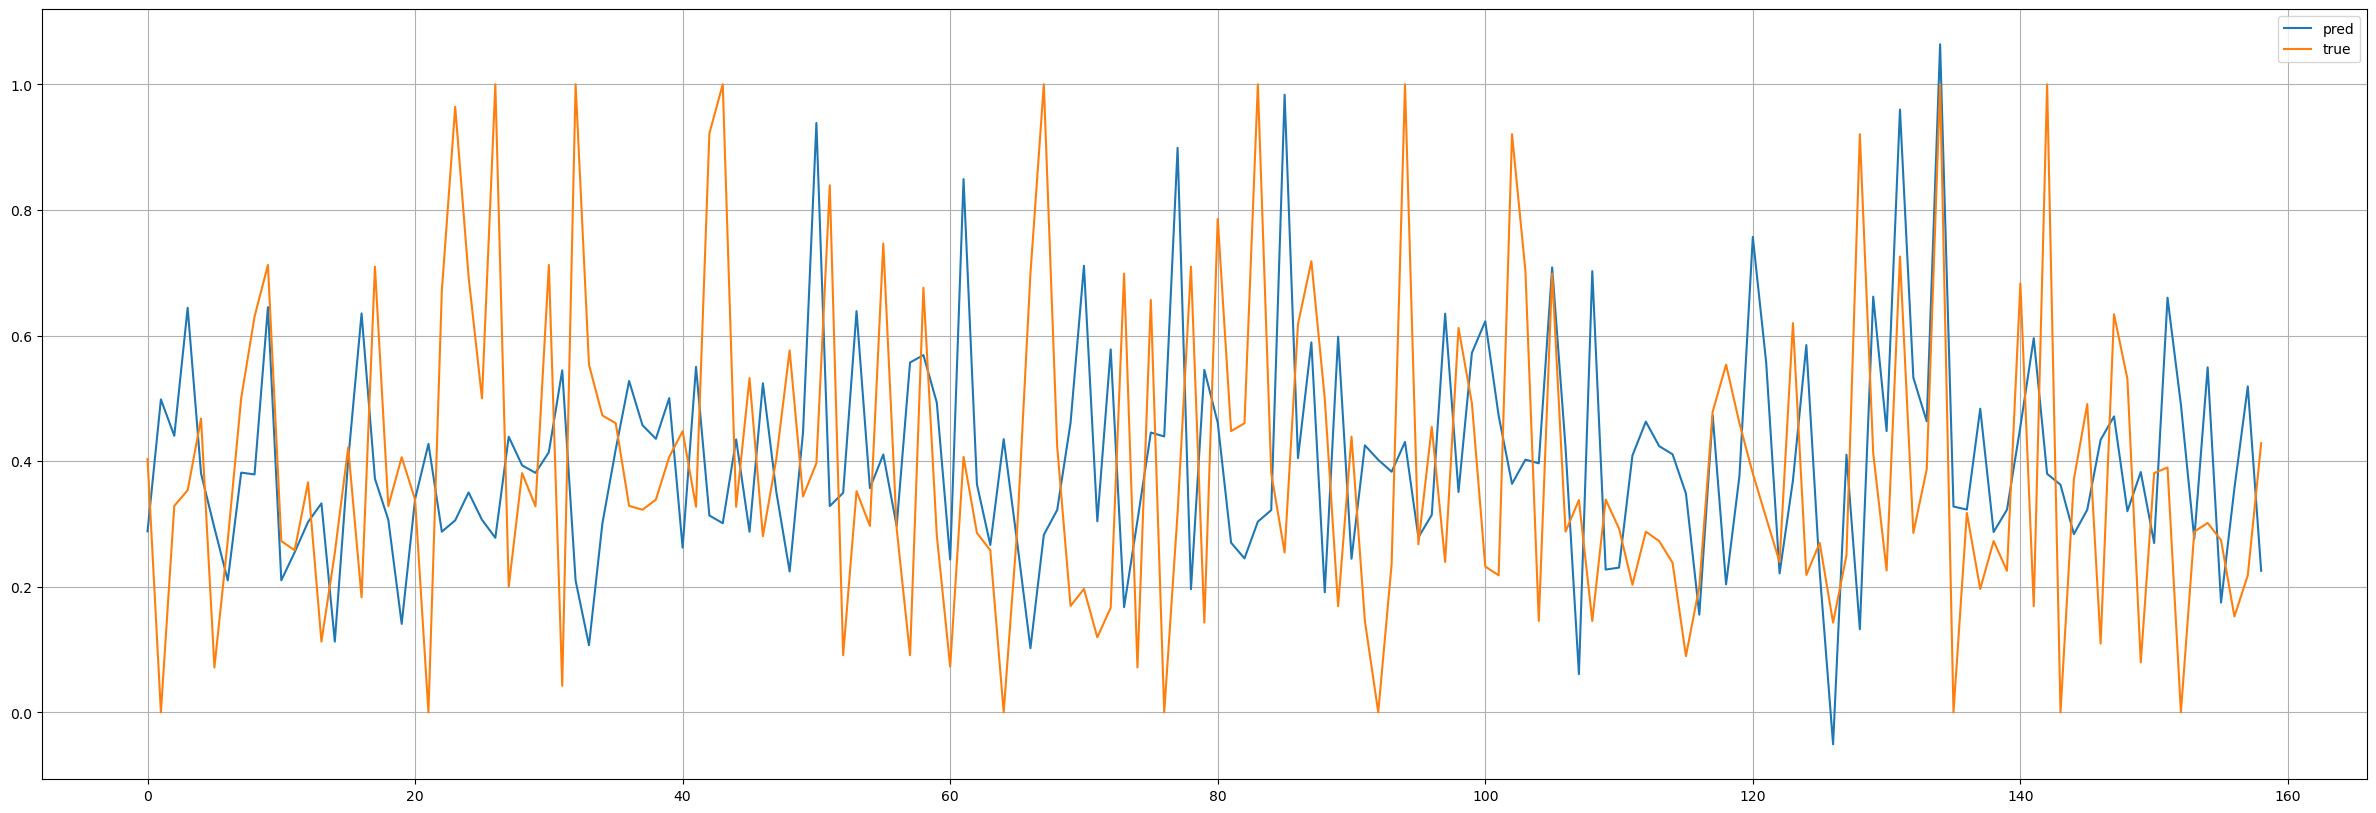

In [172]:
pred5 = fitted_model5.predict(test_X5)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y5), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [188]:
MSE5 = ((np.array(pred5) - np.array(test_y5))**2).sum() / test_X5.shape[0]
MSE5

12.57159671426373

## 2-2. 상위 5개 feature

In [223]:
X6 = FW_df[['Goals', 'Assists', 'SpG', 'PS', 'ThrB']]
y_data6 = FW_df[['Pts']]

X_data6 = sm.add_constant(X6, has_constant='add')
train_X6, test_X6, train_y6, test_y6 = train_test_split(X_data6, y_data6, train_size=0.7, test_size=0.3)

model6 = sm.OLS(train_y6, train_X6)
fitted_model6 = model6.fit()
print(fitted_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     28.49
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.29e-24
Time:                        15:55:02   Log-Likelihood:                 38.489
No. Observations:                 369   AIC:                            -64.98
Df Residuals:                     363   BIC:                            -41.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2386      0.116     -2.062      0.0

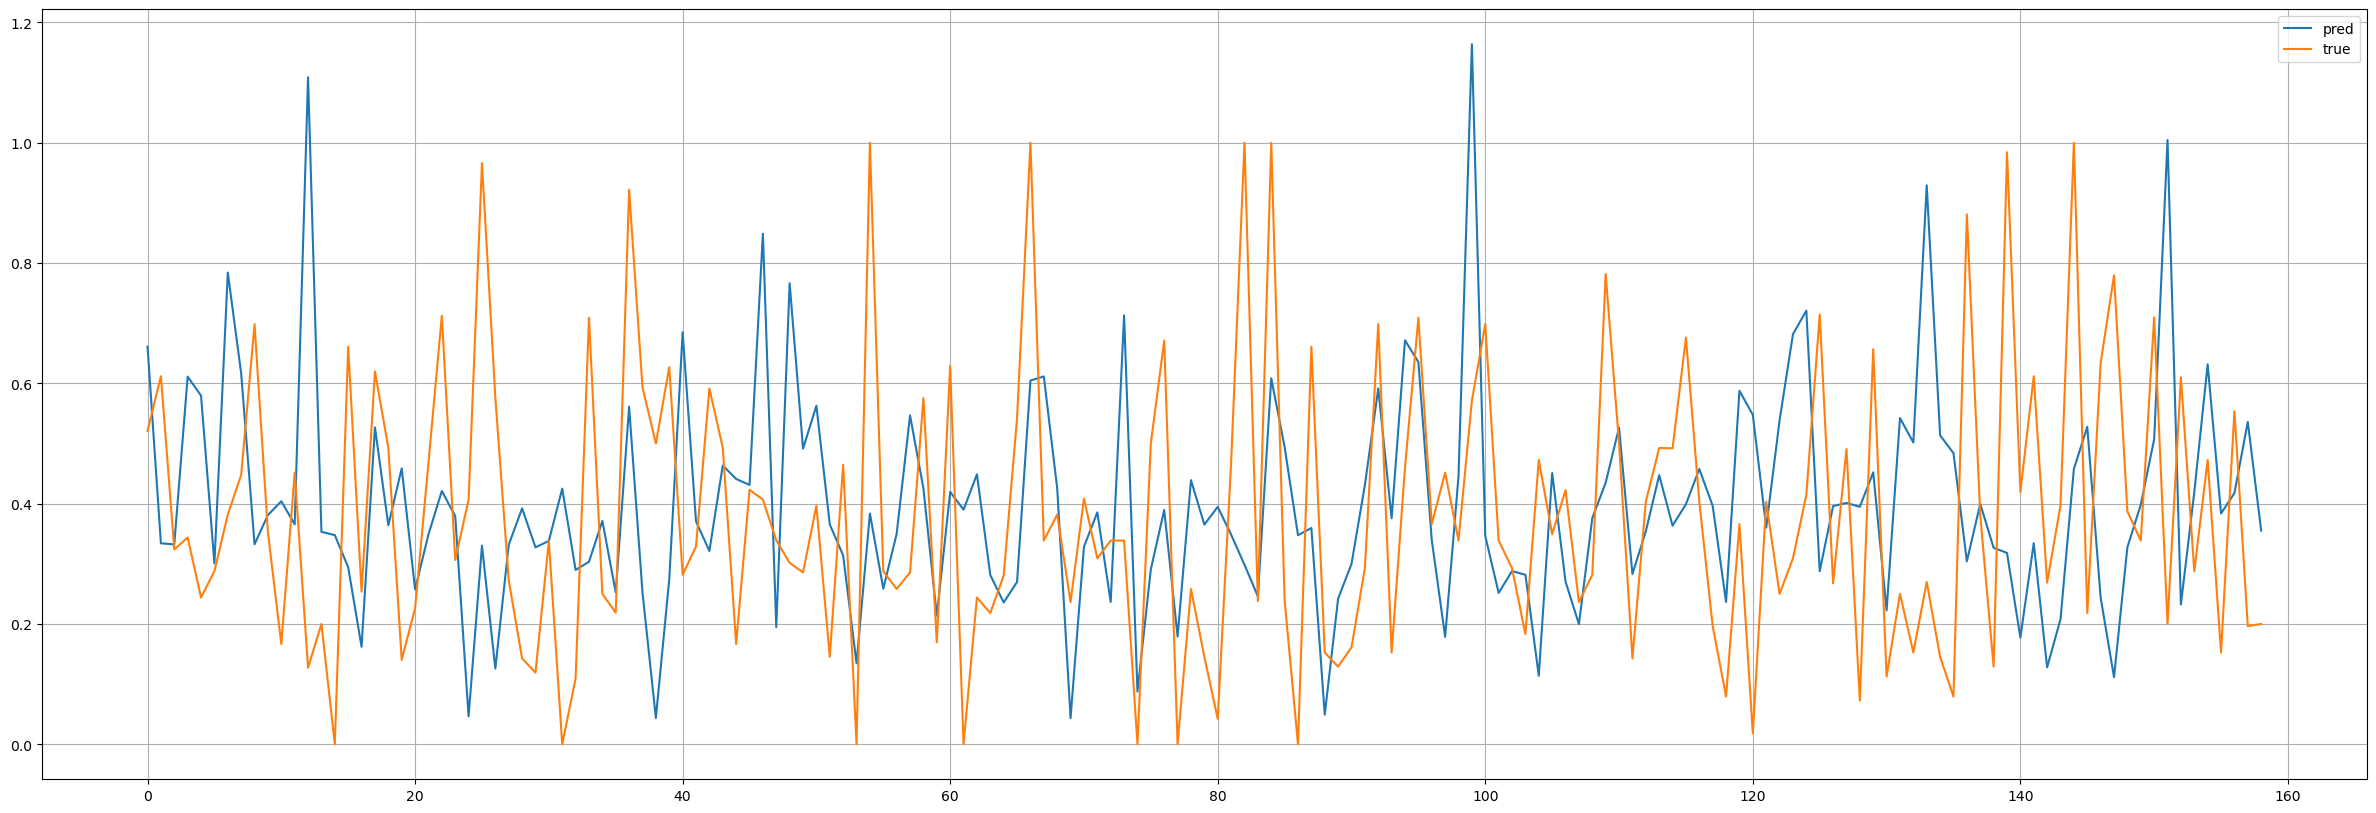

In [224]:
pred6 = fitted_model6.predict(test_X6)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y6), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [225]:
MSE6 = ((np.array(pred6) - np.array(test_y6))**2).sum() / test_X6.shape[0]
MSE6

11.305991077946887

## 쓸데없는 지표로 만든 모델

In [236]:
X8 = FW_df[['Age']]
y_data8 = FW_df[['Pts']]

X_data8 = sm.add_constant(X8, has_constant='add')
train_X8, test_X8, train_y8, test_y8 = train_test_split(X_data8, y_data8, train_size=0.7, test_size=0.3)

model8 = sm.OLS(train_y8, train_X8)
fitted_model8 = model8.fit()
print(fitted_model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2902
Date:                Thu, 09 May 2024   Prob (F-statistic):              0.590
Time:                        16:02:01   Log-Likelihood:                -13.931
No. Observations:                 369   AIC:                             31.86
Df Residuals:                     367   BIC:                             39.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4389      0.080      5.476      0.0

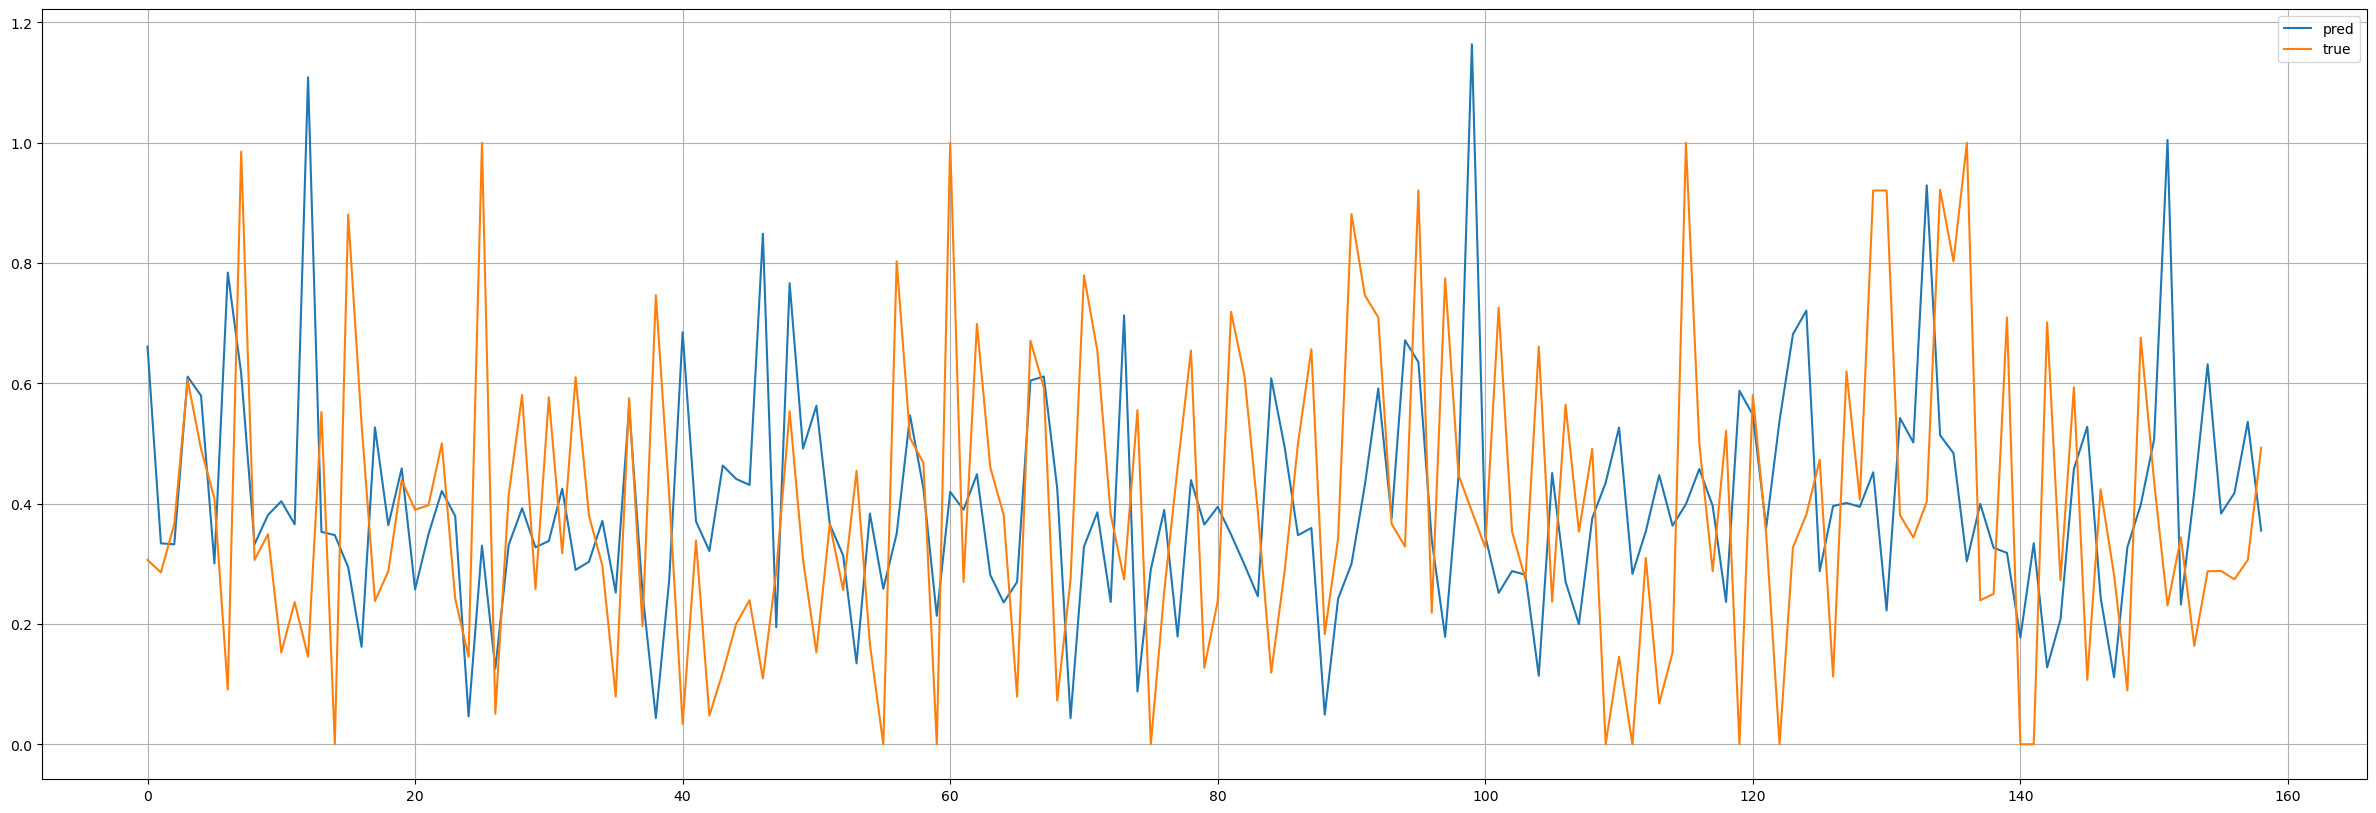

In [237]:
pred8 = fitted_model8.predict(test_X8)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred), label='pred')
plt.plot(np.array(test_y8), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [238]:
MSE8 = ((np.array(pred8) - np.array(test_y8))**2).sum() / test_X8.shape[0]
MSE8

10.111053417828256

## 3. 정말 의미 없는 지표만 제거
- Rating, MotM 등 경기 후에 나오는 지표도 제거

In [136]:
X7 = FW_df.drop(['Pts', 'Blocks', 'Disp', 'Age', 'Apps', 'Mins', 'Tackles', 'Clear', 'Rating', 'MotM'], axis=1)
y_data7 = FW_df[['Pts']]

X_data7 = sm.add_constant(X7, has_constant='add')
train_X7, test_X7, train_y7, test_y7 = train_test_split(X_data7, y_data7, train_size=0.7, test_size=0.3)

model7 = sm.OLS(train_y7, train_X7)
fitted_model7 = model7.fit()
print(fitted_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     13.61
Date:                Thu, 09 May 2024   Prob (F-statistic):           6.52e-34
Time:                        15:37:29   Log-Likelihood:                 87.186
No. Observations:                 369   AIC:                            -130.4
Df Residuals:                     347   BIC:                            -44.33
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058      0.147     -0.040      0.9

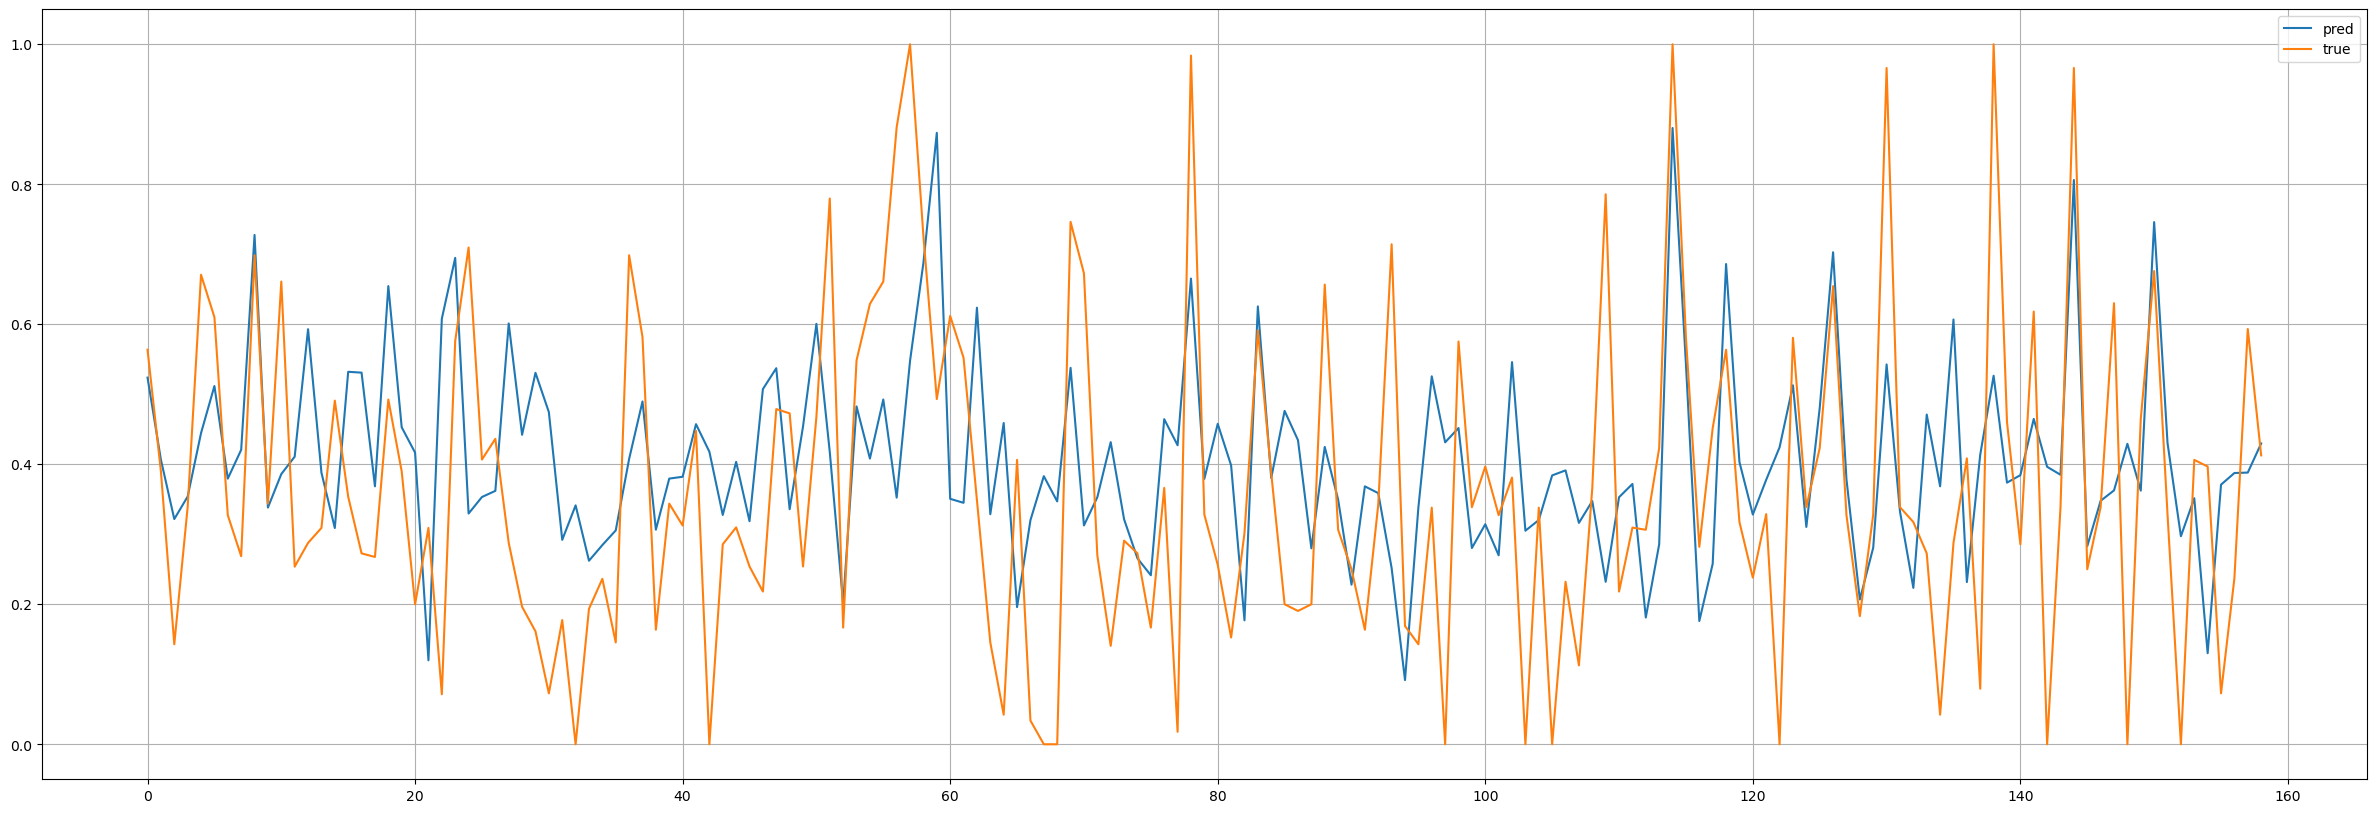

In [137]:
pred7 = fitted_model7.predict(test_X7)

plt.figure(figsize=(30, 10))
plt.plot(np.array(pred7), label='pred')
plt.plot(np.array(test_y7), label='true')
plt.grid(True)
plt.legend()
plt.show()

In [220]:
MSE7 = ((np.array(pred7) - np.array(test_y7))**2).sum() / test_X7.shape[0]
MSE7

11.929267823679139